In [12]:
! pip install numpy pandas

     ---------------------------------------- 0.0/60.9 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.9 kB 435.7 kB/s eta 0:00:01
     -------------------------------------- 60.9/60.9 kB 817.7 kB/s eta 0:00:00
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/13.1 MB ? eta -:--:--
   - -------------------------------------- 0.6/13.1 MB 12.2 MB/s eta 0:00:02
   ---- ----------------------------------- 1.4/13.1 MB 15.1 MB/s eta 0:00:01
   ------- -------------------------------- 2.4/13.1 MB 17.3 MB/s eta 0:00:01
   ---------- ----------------------------- 3.5/13.1 MB 18.7 MB/s eta 0:00:01
   -------------- ------------------------- 4.8/13.1 MB 20.4 MB/s eta 0:00:01
   ------------------- -------------------- 6.2/13.1 MB 22.1 MB/s eta 0:00:01
   ----------------------- ---------------- 7.8/13.1 MB 23.6 MB/s eta 0:00:01
   ----------------


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np 
import pandas as pd

# Data Preprocessing

#### Data overview

In [51]:
df = pd.read_csv("https://raw.githubusercontent.com/Himanshu-1703/reddit-sentiment-analysis/refs/heads/main/data/reddit.csv")
df.head(10)

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
5,you should all sit down together and watch the...,-1
6,was teens when discovered zen meditation was ...,1
7,jesus was zen meets jew,0
8,there are two varieties christians dogmatic th...,-1
9,dont worry about trying explain yourself just ...,1


In [52]:
df.shape

(37249, 2)

#### Missing data

In [53]:
df.isnull().sum()

clean_comment    100
category           0
dtype: int64

In [54]:
# seeing the comments that are missing

df[df['clean_comment'].isnull()]

,clean_comment,category
413,NaN,0
605,NaN,0
2422,NaN,0
2877,NaN,0
3307,NaN,0
...,...,...
35975,NaN,0
36036,NaN,0
37043,NaN,0
37111,NaN,0


In [55]:
# seeing the category of these comments (all labeled as neutral)
df[df['clean_comment'].isnull()]['category'].value_counts()

category
0    100
Name: count, dtype: int64

In [56]:
df.dropna(inplace=True)
df.shape

(37149, 2)

#### Duplicated data

In [57]:
df.duplicated().sum()

np.int64(350)

In [58]:
df[df.duplicated()].value_counts()

clean_comment                                                                                                                                                                                                                                                                                                                                                                             category
                                                                                                                                                                                                                                                                                                                                                                                           0          114
yes                                                                                                                                                                                                                        

In [59]:
df.drop_duplicates(inplace=True)
df.shape

(36799, 2)

In [60]:
df.duplicated().sum()

np.int64(0)

#### Removing newlines, tabs, whitespaces comments

In [61]:
df[df['clean_comment'].str.strip() == '']

,clean_comment,category
181,,0
4432,\n,0
10592,,0
16173,,0
32149,\n,0
34959,,0


In [62]:
df = df[~(df['clean_comment'].str.strip() == '')] # removing empty messages
df['clean_comment'] = df['clean_comment'].str.strip() # removing sequences of whitespaces in messages

df.shape

(36793, 2)

In [63]:
df['clean_comment'] = df['clean_comment'].str.lower() # converting messages to lowercase
df.head()

,clean_comment,category
0,family mormon have never tried explain them th...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


#### Removing URL's and comments that have newlines (\n)

In [64]:
# checking to see if there are any
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
comments_with_urls = df[df['clean_comment'].str.contains(url_pattern, regex=True)]

comments_with_urls

,clean_comment,category


In [65]:
df['clean_comment'] = df['clean_comment'].str.replace('\n', ' ', regex=True) # replacing the \n in comments with an empty space
df[df['clean_comment'].str.contains('\n')]

,clean_comment,category


In [66]:
df.duplicated().sum() # checking if the preprocessing resulted in more duplicated messages

np.int64(186)

In [67]:
df[df.duplicated()].value_counts()

clean_comment  category
what            0          3
pvst            0          3
lol             1          3
awww            1          2
\               0          2
                          ..
why not         0          1
wtf            -1          1
yep             0          1
zor bolo        0          1
’               0          1
Name: count, Length: 159, dtype: int64

In [68]:
df.drop_duplicates(inplace=True)
df.shape

(36607, 2)

In [69]:
! pip install matplotlib seaborn


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Exploratory Data Analysis

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

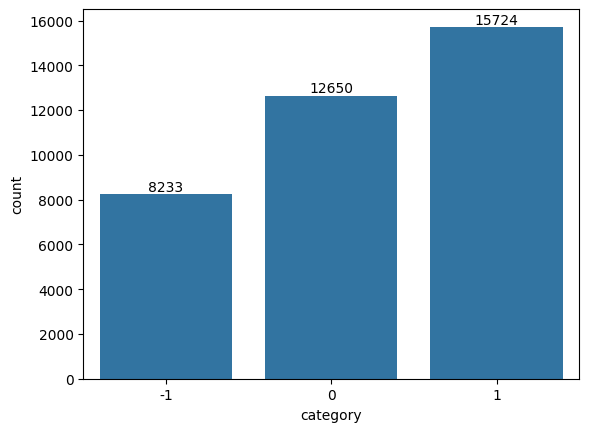

In [71]:
ax = sns.countplot(data = df, x = 'category')

for container in ax.containers:
    ax.bar_label(container, label_type='edge')

#### Word count plots

In [72]:
# creating column to count words

df['words'] = df['clean_comment'].apply(lambda x: len(x.split()))
df.head()

,clean_comment,category,words
0,family mormon have never tried explain them th...,1,39
1,buddhism has very much lot compatible with chr...,1,196
2,seriously don say thing first all they won get...,-1,86
3,what you have learned yours and only yours wha...,0,29
4,for your own benefit you may want read living ...,1,112


In [73]:
df['words'].describe()

count    36607.000000
mean        29.806649
std         56.900364
min          1.000000
25%          7.000000
50%         13.000000
75%         30.000000
max       1307.000000
Name: words, dtype: float64

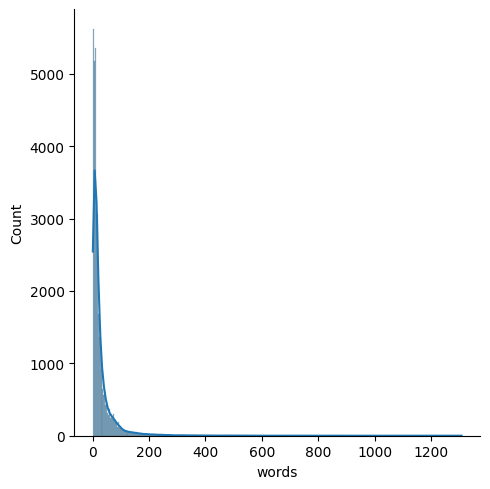

In [74]:
sns.displot(x=df['words'], kde=True)

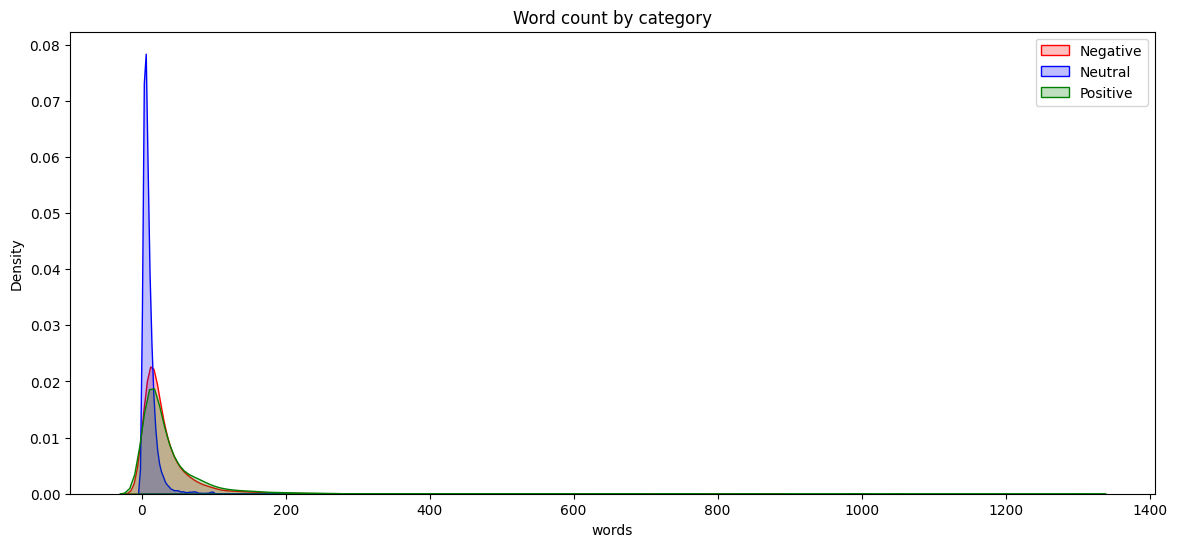

In [75]:
plt.figure(figsize=(14,6))
sns.kdeplot(df[df['category'] == -1]['words'], label = 'Negative', fill= True, color= 'red')
sns.kdeplot(df[df['category'] == 0]['words'], label = 'Neutral', fill= True, color= 'blue')
sns.kdeplot(df[df['category'] == 1]['words'], label = 'Positive', fill= True, color= 'green')

plt.title('Word count by category')

plt.legend()
plt.show()

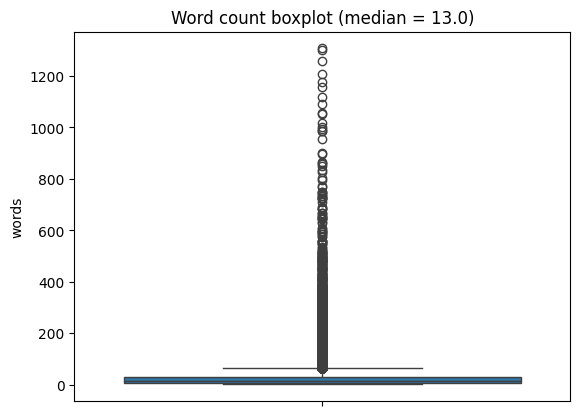

In [76]:
sns.boxplot(y=df['words'])
plt.title(f"Word count boxplot (median = {df['words'].median()})")
plt.show()

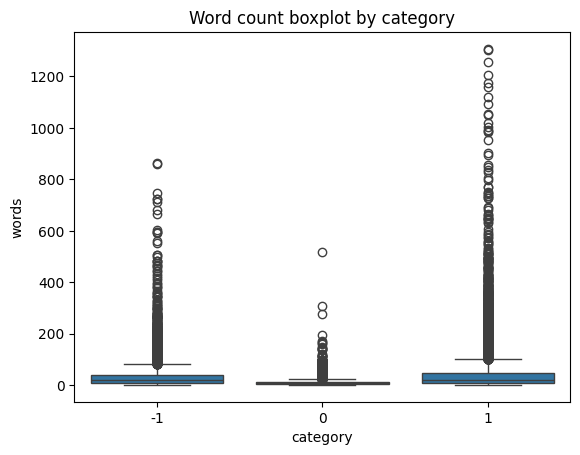

In [77]:
sns.boxplot(data=df, x = 'category', y = 'words')
plt.title("Word count boxplot by category")
plt.show() 

#### Stopwords plots

In [78]:
! pip install nltk


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [79]:
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\iuri_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [80]:
stop_words = set(stopwords.words('english'))

def count_stop_words(text):
    count = 0
    for word in text.split():
        if word in stop_words:
            count+=1
    return count

df['stop_words'] = df['clean_comment'].apply(count_stop_words)


In [81]:
df.head()

,clean_comment,category,words,stop_words
0,family mormon have never tried explain them th...,1,39,13
1,buddhism has very much lot compatible with chr...,1,196,59
2,seriously don say thing first all they won get...,-1,86,40
3,what you have learned yours and only yours wha...,0,29,15
4,for your own benefit you may want read living ...,1,112,45


<Axes: title={'center': 'Histogram distribuition of stopwords'}, xlabel='stop_words', ylabel='Count'>

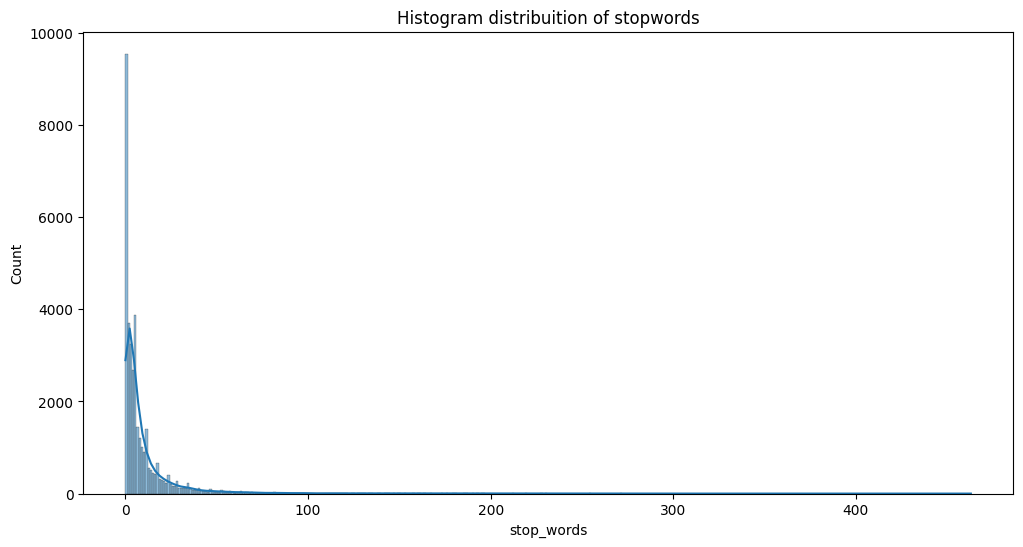

In [82]:
plt.figure(figsize=(12,6))
plt.title('Histogram distribuition of stopwords')
sns.histplot(x=df['stop_words'], kde=True)

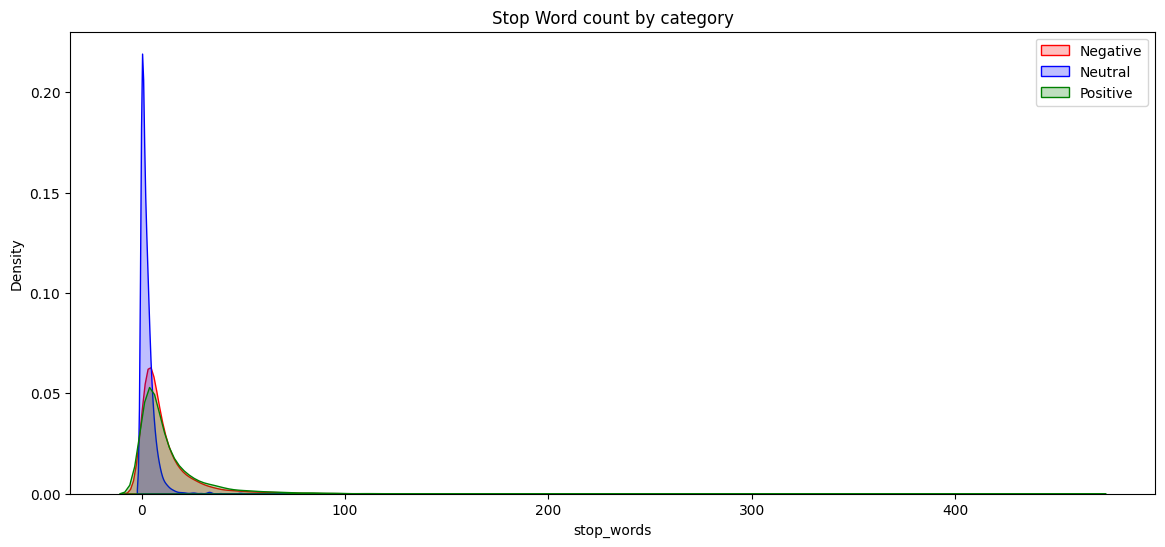

In [83]:
plt.figure(figsize=(14,6))
sns.kdeplot(df[df['category'] == -1]['stop_words'], label = 'Negative', fill= True, color= 'red')
sns.kdeplot(df[df['category'] == 0]['stop_words'], label = 'Neutral', fill= True, color= 'blue')
sns.kdeplot(df[df['category'] == 1]['stop_words'], label = 'Positive', fill= True, color= 'green')

plt.title('Stop Word count by category')

plt.legend()
plt.show()

#### Characters plots 

In [84]:
df['characters'] = df['clean_comment'].apply(len)
df.head()

,clean_comment,category,words,stop_words,characters
0,family mormon have never tried explain them th...,1,39,13,259
1,buddhism has very much lot compatible with chr...,1,196,59,1268
2,seriously don say thing first all they won get...,-1,86,40,459
3,what you have learned yours and only yours wha...,0,29,15,167
4,for your own benefit you may want read living ...,1,112,45,690


In [85]:
df['characters'].describe()

count    36607.000000
mean       182.713579
std        360.408165
min          1.000000
25%         38.000000
50%         80.000000
75%        185.000000
max       8664.000000
Name: characters, dtype: float64

In [86]:
df['punctuation_chars'] = df['clean_comment'].apply(lambda x: sum([1 for char in x if char in '.,!?;:"\'()[]{}-']))
df.head()

,clean_comment,category,words,stop_words,characters,punctuation_chars
0,family mormon have never tried explain them th...,1,39,13,259,0
1,buddhism has very much lot compatible with chr...,1,196,59,1268,0
2,seriously don say thing first all they won get...,-1,86,40,459,0
3,what you have learned yours and only yours wha...,0,29,15,167,0
4,for your own benefit you may want read living ...,1,112,45,690,0


In [87]:
from collections import Counter

# Combine all comments into one large string
all_text = ' '.join(df['clean_comment'])

# Count the frequency of each character
char_frequency = Counter(all_text)

# Convert the character frequency into a DataFrame for better display
char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['character', 'frequency']).sort_values(by='frequency', ascending=False)


In [88]:
char_frequency_df.tail()

,character,frequency
786,示,1
792,删,1
793,呗,1
794,ഥ,1
795,杨,1


#### Removing special characters and stopwords

In [89]:
# removing special characters from the comments
import re 
df['clean_comment'] = df['clean_comment'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s!?.,]', '', str(x)))

In [90]:
# removing stopwords 

# Defining stop words but keeping essential ones for sentiment analysis
stop_words2 = set(stopwords.words('english')) - {'not', 'but', 'however', 'no', 'yet'}

# Remove stop words from 'clean_comment' column, retaining essential ones
df['clean_comment'] = df['clean_comment'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words2]))

In [91]:
df.head()

,clean_comment,category,words,stop_words,characters,punctuation_chars
0,family mormon never tried explain still stare ...,1,39,13,259,0
1,buddhism much lot compatible christianity espe...,1,196,59,1268,0
2,seriously say thing first get complex explain ...,-1,86,40,459,0
3,learned want teach different focus goal not wr...,0,29,15,167,0
4,benefit may want read living buddha living chr...,1,112,45,690,0


#### Lemmatizer

In [92]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

# Define the lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization to the 'clean_comment' column
df['clean_comment'] = df['clean_comment'].apply(
    lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()])
)

df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\iuri_\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,clean_comment,category,words,stop_words,characters,punctuation_chars
0,family mormon never tried explain still stare ...,1,39,13,259,0
1,buddhism much lot compatible christianity espe...,1,196,59,1268,0
2,seriously say thing first get complex explain ...,-1,86,40,459,0
3,learned want teach different focus goal not wr...,0,29,15,167,0
4,benefit may want read living buddha living chr...,1,112,45,690,0


In [105]:
df = df[~(df['clean_comment'] == '')] # final cleaning of empty comments

In [106]:
df.to_csv("reddit_preprocessed.csv", index = False)